In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics # for the check the error and accuracy of the model
from sklearn.metrics import classification_report,confusion_matrix, roc_curve, auc, accuracy_score, precision_score, recall_score, roc_auc_score
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

pd.set_option("display.max_columns", 250)
pd.set_option("display.max_rows", 250)

In [2]:
churn_filtered=pd.read_csv('cleaneddata.csv')
churn_filtered.drop(['Unnamed: 0'], axis=1,inplace=True)
churn_filtered.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn
0,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,4.13,0.00,0.00,1.15,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,4,3,2,362,252,252,252,252,252,252,252,252,1.0,1.0,1.0,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,1.0,1.0,1.0,968,30.40,0.00,101.20,3.58,1
1,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.5,0.0,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,802,57.74,19.38,18.74,0.00,1
2,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.0,0.0,10.23,0.0,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00

In [3]:
X=churn_filtered.drop('churn', axis =1)
y=churn_filtered.churn
y.value_counts()

0    27560
1     2441
Name: churn, dtype: int64

In [4]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state = 10)
print("X_train Shape : ", X_train.shape)
print("X_test Shape : ", X_test.shape)

X_train Shape :  (21000, 146)
X_test Shape :  (9001, 146)


In [5]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [6]:
#Importing the PCA module
from sklearn.decomposition import PCA
pca = PCA()

#Doing the PCA on the train data
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [7]:
# look at explainded variance of PCA components
print(pd.Series(np.round(pca.explained_variance_ratio_.cumsum(), 4)*100))

0       55.19
1       63.85
2       70.36
3       75.78
4       78.58
5       81.03
6       83.15
7       85.12
8       86.68
9       87.75
10      88.62
11      89.34
12      90.05
13      90.68
14      91.25
15      91.77
16      92.23
17      92.69
18      93.08
19      93.46
20      93.83
21      94.17
22      94.50
23      94.83
24      95.11
25      95.37
26      95.62
27      95.84
28      96.04
29      96.24
30      96.43
31      96.62
32      96.80
33      96.97
34      97.14
35      97.29
36      97.44
37      97.58
38      97.71
39      97.81
40      97.91
41      98.00
42      98.09
43      98.18
44      98.26
45      98.34
46      98.41
47      98.48
48      98.54
49      98.61
50      98.67
51      98.73
52      98.78
53      98.84
54      98.89
55      98.94
56      98.99
57      99.04
58      99.09
59      99.14
60      99.18
61      99.23
62      99.27
63      99.31
64      99.34
65      99.38
66      99.41
67      99.45
68      99.48
69      99.50
70      99.53
71    

<Figure size 576x360 with 0 Axes>

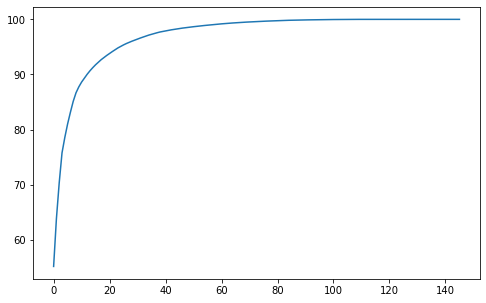

In [8]:
# plot feature variance
features = range(pca.n_components_)
cumulative_variance = np.round(np.cumsum(pca.explained_variance_ratio_)*100, decimals=4)
plt.figure(figsize=(160/20,100/20)) # 100 elements on y-axis; 160 elements on x-axis; 20 is normalising factor
plt.plot(cumulative_variance)

In [9]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
from sklearn.decomposition import PCA
pca_final = PCA(n_components=60)

In [10]:
X_train = pca_final.fit_transform(X_train)
X_train.shape

(21000, 60)

In [11]:
X_test = pca_final.transform(X_test)
X_test.shape

(9001, 60)

In [12]:
# Creating a function to plot ROC curve and finding AUC.
def plot_roc_auc(model):
    y_pred_proba = model.predict_proba(X_test)[:,1]
    fpr, tpr, threshold = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=[6.4, 4.8])
    ##Adding the ROC
    plt.plot(fpr, tpr, 'r', label = 'AUC = %0.2f' % roc_auc)
    plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
    ##Title and label
    plt.legend(loc = 'lower right')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC curve')
    plt.show()
    return roc_auc

# Creating a function for Confusion Matrix
def conf_matrix_plot(model):
    plt.figure(figsize=(6,4))
    ConfMatrix = confusion_matrix(y_test,model.predict(X_test))
    akws = {"ha": 'left',"va": 'top'}
    sns.heatmap(ConfMatrix,annot=True,annot_kws=akws, cmap="Blues", fmt="d", xticklabels = ['Non-default', 'Default'], yticklabels = ['Non-default', 'Default'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title("Confusion Matrix")

In [13]:
# Balancing DataSet
from imblearn.over_sampling import SMOTE

sm = SMOTE()
X_train_sm,y_train_sm = sm.fit_sample(X_train,y_train)

## Logistic Regression

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

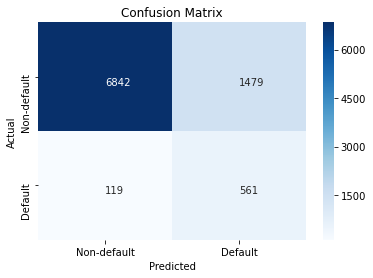

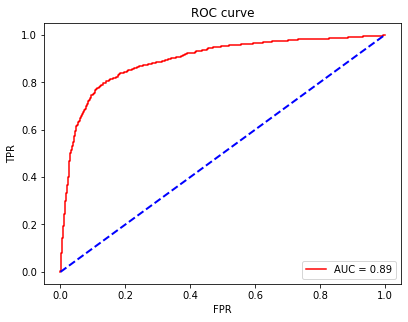

In [14]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
from imblearn.metrics import sensitivity_specificity_support
log_reg = LogisticRegression()
log_reg.fit(X_train_sm, y_train_sm)

# Predicting the Test set results
y_pred_lr = log_reg.predict(X_test)
y_pred_lrt = log_reg.predict(X_train_sm)


conf_matrix_plot(log_reg)

print()

# Plotting ROC 
auc_lr = plot_roc_auc(log_reg)

In [15]:
# check sensitivity and specificity
print('Accuracy   :\t',round(log_reg.score(X_test,y_test),4))
sensitivity_lr, specificity_lr, _ = sensitivity_specificity_support(y_test, y_pred_lr, average='binary')
print("Sensitivity: \t", round(sensitivity_lr, 4))
print("Specificity: \t", round(specificity_lr, 4))
print('AUC        :\t',round(auc_lr,4))

Accuracy   :	 0.8225
Sensitivity: 	 0.825
Specificity: 	 0.8223
AUC        :	 0.8934


In [16]:
#Testing accuracy for training data
print('Accuracy   : \t',round(log_reg.score(X_train_sm, y_train_sm),4))

Accuracy   : 	 0.8358


## Random Forest

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features=10,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

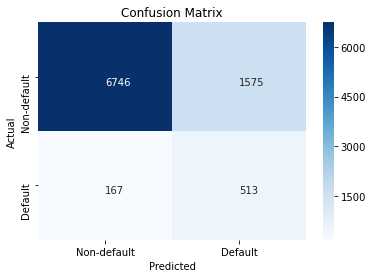

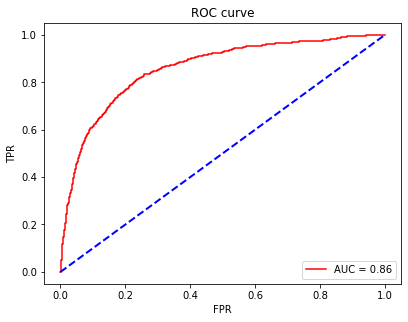

In [17]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=500, max_depth=4, max_features=10)
rf_model.fit(X_train_sm, y_train_sm)

# Predicting the Test set results
y_pred_rf = rf_model.predict(X_test)

#Confusion Matrix
conf_matrix_plot(rf_model)

print()

# Plotting ROC 
auc_rf = plot_roc_auc(rf_model)

In [18]:
# check sensitivity and specificity
print('Accuracy   : \t',round(rf_model.score(X_test, y_test),4))
sensitivity_rf, specificity_rf, _ = sensitivity_specificity_support(y_test, y_pred_rf, average='binary')
print("Sensitivity: \t", round(sensitivity_rf, 2))
print("Specificity: \t", round(specificity_rf, 2))
print('AUC        : \t',round(auc_rf,2))

Accuracy   : 	 0.8065
Sensitivity: 	 0.75
Specificity: 	 0.81
AUC        : 	 0.86


In [19]:
#Testing accuracy for training data
print('Accuracy   : \t',round(rf_model.score(X_train_sm, y_train_sm),4))

Accuracy   : 	 0.8192


## XGBoost

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=3,
              max_features=10, min_child_weight=1, missing=nan,
              monotone_constraints=None, n_estimators=5, n_jobs=0,
              num_parallel_tree=1, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method=None, validate_parameters=False, verbosity=None)

Confusion Matrix : 



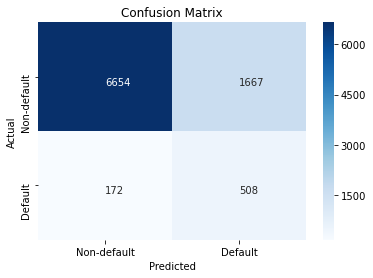

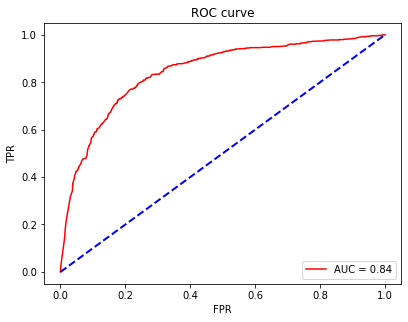

In [72]:
from xgboost import XGBClassifier
xgb = XGBClassifier(max_depth=3, n_estimators=5, max_features=10)
xgb.fit(X_train_sm, y_train_sm)
y_pred_xgb = xgb.predict(X_test)

# Making the Confusion Matrix
print('Confusion Matrix : ')
#Confusion Matrix
conf_matrix_plot(xgb)

print()

# Plotting ROC curve. 
auc_xgb = plot_roc_auc(xgb)

In [73]:
print('Accuracy   : \t',round(xgb.score(X_test, y_test),4))
sensitivity_xgb, specificity_xgb, _ = sensitivity_specificity_support(y_test, y_pred_xgb, average='binary')
print("Sensitivity: \t", round(sensitivity_xgb, 4))
print("Specificity: \t", round(specificity_xgb, 4))
print('AUC        : \t',round(auc_xgb,4))

Accuracy   : 	 0.7957
Sensitivity: 	 0.7471
Specificity: 	 0.7997
AUC        : 	 0.8438


In [74]:
#Testing accuracy for training data
print('Accuracy   : \t',round(xgb.score(X_train_sm, y_train_sm),4))

Accuracy   : 	 0.7936


## Logistic Regression - Hyperparameter Tuning

In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import fbeta_score, make_scorer
f1_scorer = make_scorer(fbeta_score, beta=1)
# Hyperparameters to be checked.
parameters = {'C':[0.0001, 0.001, 0.01, 1, 0.1, 10, 100, 1000], 'penalty':['none','l2'] ,
              'solver':['lbfgs','sag','saga','newton-cg'],'max_iter':[100,300,500,700,1000]}

# Logistic Regression estimator.
logreg_gs=LogisticRegression()

# GridSearchCV estimator.
logreg_gsmodel = GridSearchCV(logreg_gs, parameters, cv=5, n_jobs=-1,scoring='recall',verbose=10)

# Train the GridSearchCV estimator and search for the best parameters.
logreg_gsmodel.fit(X_train_sm,y_train_sm)
best_param=logreg_gsmodel.best_params_

best_param

Fitting 5 folds for each of 320 candidates, totalling 1600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   10.1s
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:   14.2s
[Parallel(n_jobs=-1)]: Done  61 tasks      | elapsed:   18.5s
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:   20.1s
[Parallel(n_jobs=-1)]: Done  89 tasks      | elapsed:   25.3s
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:   30.1s
[Parallel(n_jobs=-1)]: Done 121 tasks      | elapsed:   35.6s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   40.0s
[Parallel(n_jobs=-1)]: Done 157 tasks      | elapsed:   43.6s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   51.4s
[Parallel(n_jobs=-1)]: Done 197 tasks      | elapsed:  

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 1, 0.1, 10, 100, 1000],
                         'max_iter': [100, 300, 500, 700, 1000],
                         'penalty': ['none', 'l2'],
                         'solver': ['lbfgs', 'sag', 'saga', 'newton-cg']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
          

{'C': 100, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Confusion Matrix : 



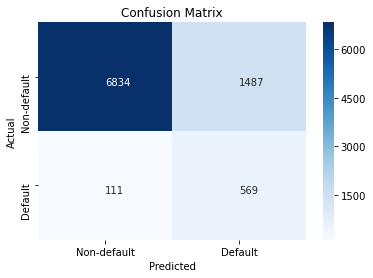

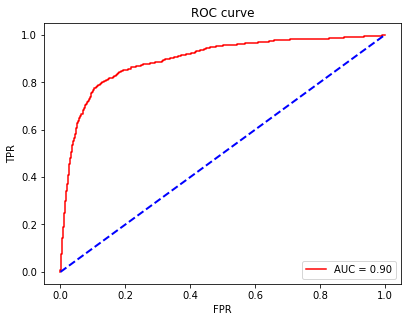

In [43]:
logreg_gridsearch=LogisticRegression(C = best_param['C'], penalty= best_param['penalty'], solver=best_param['solver'],max_iter=best_param['max_iter'])
logreg_gridsearch.fit(X_train_sm, y_train_sm)

# Predicting the Test set results
y_pred_lrgs = logreg_gridsearch.predict(X_test)

# Making the Confusion Matrix
print('Confusion Matrix : ')
#Confusion Matrix
conf_matrix_plot(logreg_gridsearch)
# Plotting ROC curve. 
print()
auc_lrgs= plot_roc_auc(logreg_gridsearch)

In [44]:
# check sensitivity and specificity
from imblearn.metrics import sensitivity_specificity_support
print('Accuracy   : \t',round(logreg_gridsearch.score(X_test, y_test),4))
sensitivity_lrgs, specificity_lrgs, _ = sensitivity_specificity_support(y_test, y_pred_lrgs, average='binary')
print("Sensitivity: \t", round(sensitivity_lrgs, 4))
print("Specificity: \t", round(specificity_lrgs, 4))
print('AUC        : \t',round(auc_lrgs,4))

Accuracy   : 	 0.8225
Sensitivity: 	 0.8368
Specificity: 	 0.8213
AUC        : 	 0.8957


In [45]:
#Testing accuracy for training data
print('Accuracy   : \t',round(logreg_gridsearch.score(X_train_sm, y_train_sm),4))

Accuracy   : 	 0.8385


## Conclusion
It is noticed that the usage of calls and data is drastically reduced in the action phase. This may be due to the following facts:
- The customers are not happy with the tariff rates
- The customers are facing network issues. 
- The competitors may be providing better tariff rates.





If the customers are facing network issues, the company can check the location of the churned out customers and pin-point the locations facing such network issues.

Therefore, if the calls and data usage of customers is decreasing, then it is a strong indicator that the customer will churn out. In this case, the company can give some attractive offers to such customers to retain them.